# <font color = 'red'> Netflix Movies and TV shows <font>

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Netflix_movies_and_tv_shows_clustering.csv\Netflix_movies_and_tv_shows_clustering.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Understanding the data

In [8]:
#dimension of data
df.shape

(7787, 12)

**The dataset contains 7787 records and 12 attributes.**

In [10]:
#unique values in each  column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

The attribute show_id is unique i.e every tv show and movie has a **unique show_id**

In [12]:
#checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **Data Cleaning**

In [14]:
# Checking for duplicate records
df.duplicated().sum()

0

There are **no duplicate values**

### Handling Null values

<Axes: >

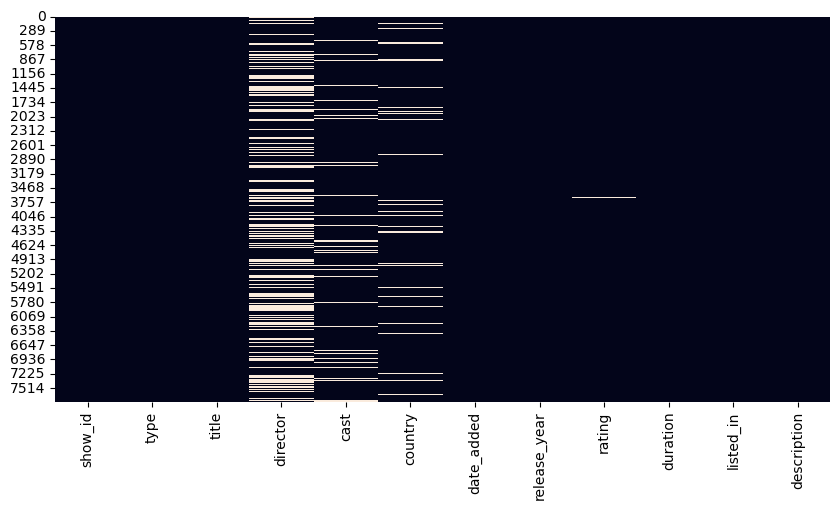

In [17]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

In [18]:
# checking for missing values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are many missing values in director, cast, country, date_added, and rating columns.

- The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

In [21]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('unknown')

- The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [23]:
df['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [24]:
df[['rating']] = df[['rating']].fillna(df['rating'].mode())

- records with missing values in the date_added column can be dropped, since they are significantly low (10)

In [26]:
df.dropna(axis = 0, inplace = True)

In [27]:
df.shape

(7770, 12)

In [28]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

There are no missing values any more

### Changing datatype

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


#### Typecasting 'duration' from string to integer

In [33]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

For Tv shows, the duration represents **`'number of seasons'`**

In [35]:
df[df['type']=='TV Show'].duration.value_counts()

duration
1     1606
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

For movies, the duration represents **`'movie length in minutes'`**

In [37]:
df[df['type']=='Movie'].duration.value_counts()

duration
90     136
93     131
94     125
91     125
95     119
      ... 
182      1
224      1
37       1
233      1
191      1
Name: count, Length: 201, dtype: int64

In [38]:
# datatype of duration
df.duration.dtype

dtype('int64')

#### Typecasting 'date_added' from string to datetime:

In [40]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [41]:
df.date_added.dtype

dtype('<M8[ns]')

In [42]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   int64         
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  month_added   7770 non-null   int32         
 13  year_added    7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(9)
memory usage: 849.8+ KB


### Removing Leading and Trailing spaces

In [45]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Standardizing column names to lowercase and snake_case

In [47]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [48]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


### Saving the cleaned data

In [50]:
df.to_csv('netflix_cleaned.csv', index=False)